In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/2019-Nov.csv')

### How many unique event types are there?

In [3]:
df.event_type.unique()

array(['view', 'cart', 'remove_from_cart', 'purchase'], dtype=object)

In [4]:
df.head(20)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
5,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
6,2019-11-01 00:00:25 UTC,view,5856189,1487580009026551821,NaN,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
7,2019-11-01 00:00:32 UTC,view,5837835,1933472286753424063,NaN,NaN,3.49,514649199,432a4e95-375c-4b40-bd36-0fc039e77580
8,2019-11-01 00:00:34 UTC,remove_from_cart,5870838,1487580007675986893,NaN,milv,0.79,429913900,2f0bff3c-252f-4fe6-afcd-5d8a6a92839a
9,2019-11-01 00:00:37 UTC,view,5870803,1487580007675986893,NaN,milv,0.79,429913900,2f0bff3c-252f-4fe6-afcd-5d8a6a92839a


### Get relative purchase score
This is the number of times a user has purchased a specfic item relative to all other purchased

#### Create a dummy column representing a buy

In [5]:
df['qty'] = df.event_type.apply(lambda event: 1 if event == "purchase" else 0)

In [6]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,qty
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,0
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,0
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f,0
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7,0
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,0


### What is the relative purchase for each product by each user? 
How frequently is each product purchased on average by each user? 

This will represent the approximate score given by each user to a specific product

In [7]:
user_purchase_df = df.query(
                        'event_type == "purchase"'
                     ).groupby(
                        ['user_id', 'product_id']
                     )['qty'].sum().rename('user_purchase_count')

In [8]:
user_purchase_df.head()

user_id   product_id
9794320   5724621       1
          5809910       1
          5811668       1
          5812033       1
10079204  5614842       1
Name: user_purchase_count, dtype: int64

In [9]:
# get relative purchase count for each user
user_purchase_relative = user_purchase_df / user_purchase_df.groupby(level=[0]).transform('sum')

In [10]:
user_purchase_relative.head(10)

user_id   product_id
9794320   5724621       0.2500
          5809910       0.2500
          5811668       0.2500
          5812033       0.2500
10079204  5614842       0.5000
          5766379       0.5000
10280338  5809910       0.1250
          5809911       0.0625
          5809912       0.0625
          5816166       0.0625
Name: user_purchase_count, dtype: float64

In [11]:
df = df.join(
        user_purchase_relative, 
        on=['user_id', 'product_id'], 
        how='left'
    ).rename(
        columns={'user_purchase_count':'user_purchase_score'}
    )

In [12]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,qty,user_purchase_score
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,0,NaN
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,0,NaN
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f,0,NaN
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7,0,NaN
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,0,NaN


#### Purchase score will only be present for `purchase` event types

### Calculate the `purchase score` for each product, i.e. average of how frequently was each product purchased compared to all products purchased by each user

In [13]:
df_product_purchase_score = df.query(
                        'event_type == "purchase"'
                        ).groupby(
                            ['product_id']
                        )['user_purchase_score'].mean().rename('product_purchase_score')

In [14]:
df_product_purchase_score.tail()

product_id
5909233    0.058824
5909237    0.085317
5909238    0.050000
5909240    0.050000
5909245    0.027778
Name: product_purchase_score, dtype: float64

In [15]:
df = df.join(df_product_purchase_score, on=['product_id'], how='inner')

In [16]:
# df=df.drop(['relative_purchase'], axis=1)
df.query('event_type == "purchase"').head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,qty,user_purchase_score,product_purchase_score
3195,2019-11-01 02:58:48 UTC,purchase,5802432,1487580009286598681,NaN,NaN,0.32,548499881,1bf226f2-d17e-420c-8a5e-77219415a2b9,1,0.083333,0.097111
30086,2019-11-01 09:09:52 UTC,purchase,5802432,1487580009286598681,NaN,NaN,0.32,530160775,f03e6ee8-4197-81b7-5860-7eb361fb75fb,1,0.083333,0.097111
32644,2019-11-01 09:34:25 UTC,purchase,5802432,1487580009286598681,NaN,NaN,0.32,555773238,b77fdbb1-9ea9-4637-9f25-9643755cd097,1,0.200000,0.097111
32942,2019-11-01 09:36:48 UTC,purchase,5802432,1487580009286598681,NaN,NaN,0.32,555307780,8b744bd5-d1fd-4eb2-802c-74338202d80a,1,0.142857,0.097111
40999,2019-11-01 10:42:44 UTC,purchase,5802432,1487580009286598681,NaN,NaN,0.32,104808268,390c3cf3-2fee-4a24-bf1e-c79dd3b33dd2,1,0.050000,0.097111
41771,2019-11-01 10:50:00 UTC,purchase,5802432,1487580009286598681,NaN,NaN,0.32,558949163,e8e2aaaf-0f15-4a91-a371-30d2a5300e5f,1,0.025000,0.097111
43527,2019-11-01 11:05:53 UTC,purchase,5802432,1487580009286598681,NaN,NaN,0.32,389302353,f85cda0d-fcee-41c4-bdcd-d269e4845f26,1,0.100000,0.097111
44232,2019-11-01 11:12:11 UTC,purchase,5802432,1487580009286598681,NaN,NaN,0.32,555981203,4a3a69df-94f0-42ce-90d1-d150924cfb62,1,0.111111,0.097111
44790,2019-11-01 11:17:55 UTC,purchase,5802432,1487580009286598681,NaN,NaN,0.32,549157066,8ef0e715-0d51-4b82-b29e-a9d0b79b979e,1,0.090909,0.097111
48304,2019-11-01 11:50:25 UTC,purchase,5802432,1487580009286598681,NaN,NaN,0.32,518542185,63e276a3-959c-44f5-aa2a-ffc0dba39b22,1,0.052632,0.097111


### Is there correlation between users viewing an item and purchase?

In [17]:
user_product_view = df.query(
                        'event_type == "view"'
                    ).groupby(
                        ['user_id', 'product_id']
                    )['qty'].value_counts().rename("user_view_score")

In [18]:
user_product_view.head()

user_id  product_id  qty
1120748  5240        0      1
1458813  5542414     0      1
         5711078     0      1
         5711087     0      2
         5711117     0      1
Name: user_view_score, dtype: int64

In [19]:
user_product_view_relative = user_product_view/user_product_view.groupby(level=[0]).transform('sum')

In [20]:
user_product_view_relative.head()

user_id  product_id  qty
1120748  5240        0      1.000000
1458813  5542414     0      0.045455
         5711078     0      0.045455
         5711087     0      0.090909
         5711117     0      0.045455
Name: user_view_score, dtype: float64

In [21]:
df = df.merge(user_product_view_relative, on=['user_id', 'product_id'])

In [22]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,qty,user_purchase_score,product_purchase_score,user_view_score
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,0,NaN,0.097111,0.125
1,2019-11-01 05:16:33 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,566323072,50c9bb5c-a5f5-4fe3-a07b-8e27677dda0a,0,NaN,0.097111,0.500
2,2019-11-01 06:02:05 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,566335693,3d536b41-c823-48e3-bbbe-c7010b50ff09,0,NaN,0.097111,0.250
3,2019-11-01 06:14:16 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,563514035,0d009956-b8a1-414d-b890-51e706677de1,0,NaN,0.097111,0.200
4,2019-11-01 06:56:40 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,566350171,2b73508e-be8f-4844-8307-d03c71b75468,0,NaN,0.097111,1.000


In [23]:
df_corr = df[['price', 'user_view_score', 'user_purchase_score']].corr()

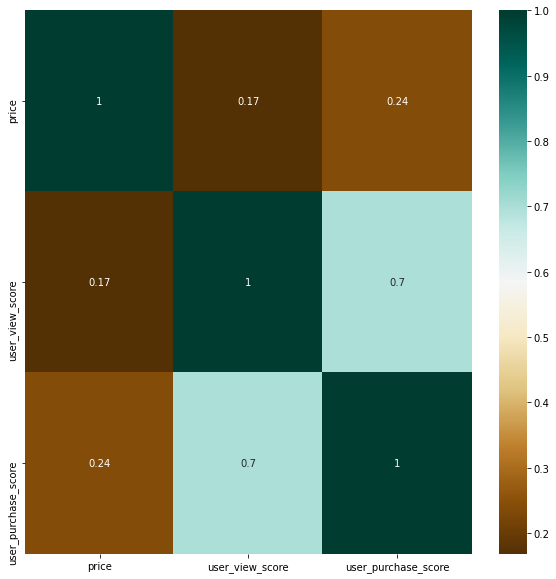

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr, cmap='BrBG', annot=True)

#### Strong correlation between user view and purchase implied, lets visualize the scatter plot

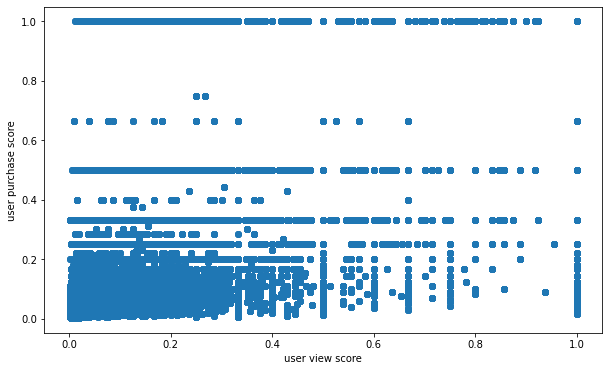

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['user_view_score'], df['user_purchase_score'])
ax.set_xlabel('user view score')
ax.set_ylabel('user purchase score')
plt.show()

### What is the inclination of a user toward a specific brand?

Calculate the relative frequency with which each user bought, viewed or purchased a brand

In [26]:
user_brand_affinity = df.query(
                        'event_type in ["view", "cart", "purchase"] and brand'
                      ).groupby(
                        ['user_id', 'brand']
                    )['qty'].value_counts().rename(
                        'user_brand_affinity'
                        )

In [27]:
user_brand_affinity.head(10)

user_id  brand    qty
1120748  runail   0       1
1458813  f.o.x    0      17
         grattol  0       2
         masura   0       1
5493470  runail   0       4
8072106  cnd      0       1
9478445  yoko     0       2
9794320  grattol  0       9
                  1       1
         irisk    0      78
Name: user_brand_affinity, dtype: int64

In [28]:
user_brand_affinity_relative = user_brand_affinity / user_brand_affinity.groupby(level=[0]).transform('sum')

In [29]:
user_brand_affinity_relative.head(10)

user_id  brand    qty
1120748  runail   0      1.000000
1458813  f.o.x    0      0.850000
         grattol  0      0.100000
         masura   0      0.050000
5493470  runail   0      1.000000
8072106  cnd      0      1.000000
9478445  yoko     0      1.000000
9794320  grattol  0      0.081081
                  1      0.009009
         irisk    0      0.702703
Name: user_brand_affinity, dtype: float64

In [30]:
# use merge instead of join since we are not using index to perform join
df = df.merge(
            user_brand_affinity_relative, 
            on=['user_id', 'brand'],
            how='left'
        )

In [31]:
df.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,qty,user_purchase_score,product_purchase_score,user_view_score,user_brand_affinity
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,0,NaN,0.097111,0.125000,NaN
1,2019-11-01 05:16:33 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,566323072,50c9bb5c-a5f5-4fe3-a07b-8e27677dda0a,0,NaN,0.097111,0.500000,NaN
2,2019-11-01 06:02:05 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,566335693,3d536b41-c823-48e3-bbbe-c7010b50ff09,0,NaN,0.097111,0.250000,NaN
3,2019-11-01 06:14:16 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,563514035,0d009956-b8a1-414d-b890-51e706677de1,0,NaN,0.097111,0.200000,NaN
4,2019-11-01 06:56:40 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,566350171,2b73508e-be8f-4844-8307-d03c71b75468,0,NaN,0.097111,1.000000,NaN
5,2019-11-01 07:24:35 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,566357005,c8c905f6-98b1-49e0-b5f7-6d23b105f85e,0,NaN,0.097111,0.025000,NaN
6,2019-11-01 07:27:50 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,296906171,a069c4ee-1b89-4487-b009-49f346292da2,0,NaN,0.097111,0.005988,NaN
7,2019-11-01 07:44:05 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,555307780,9821797a-2901-45d3-9b6e-645e52fcc469,0,0.142857,0.097111,0.037037,NaN
8,2019-11-01 07:45:30 UTC,cart,5802432,1487580009286598681,NaN,NaN,0.32,555307780,9821797a-2901-45d3-9b6e-645e52fcc469,0,0.142857,0.097111,0.037037,NaN
9,2019-11-01 09:11:06 UTC,cart,5802432,1487580009286598681,NaN,NaN,0.32,555307780,c47ffe1c-9eb3-4523-817e-204fe9955ee0,0,0.142857,0.097111,0.037037,NaN


In [32]:
df[['user_purchase_score', 'product_purchase_score', 'user_brand_affinity']].describe().round(decimals=2)

,user_purchase_score,product_purchase_score,user_brand_affinity
count,835341.00,3315822.00,2123923.00
mean,0.14,0.13,0.36
std,0.19,0.11,0.35
min,0.00,0.00,0.00
25%,0.04,0.06,0.07
50%,0.08,0.09,0.22
75%,0.17,0.14,0.62
max,1.00,1.00,1.00


### Basic recommendation based on product purchase score

#### How often on average is each product purchased? - calculating average rating for each product

In [49]:
# create a new dataframe
product_rating = pd.DataFrame(df.groupby('product_id')['product_purchase_score'].mean().rename('product_purchase_rate'))

In [50]:
product_rating.head(10)

,product_purchase_rate
product_id,
3762,0.265545
3763,0.223039
3774,0.258261
3776,0.370476
3806,0.204653
3928,0.173214
3929,0.052632
3936,0.191334
3945,0.182647


In [51]:
type(product_rating)

pandas.core.frame.DataFrame

In [53]:
product_rating['number_of_purchases'] = df.groupby('product_id')['product_purchase_score'].count()

In [54]:
product_rating.head()

,product_purchase_rate,number_of_purchases
product_id,,
3762,0.265545,943
3763,0.223039,143
3774,0.258261,391
3776,0.370476,93
3806,0.204653,187


#### Visualize the ratings using a histogram

Text(0, 0.5, 'Number of purchases')

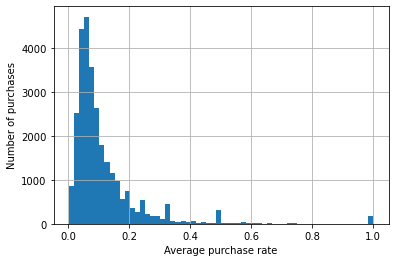

In [56]:
product_rating['product_purchase_rate'].hist(bins=60)
plt.xlabel('Average purchase rate')
plt.ylabel('Number of purchases')

#### Majority of the purchases have a rate of less than `0.2`

#### There are also spikes at `0.5` and `1.0` implying a comparision between two products and a single type of purchase

Text(0, 0.5, 'count')

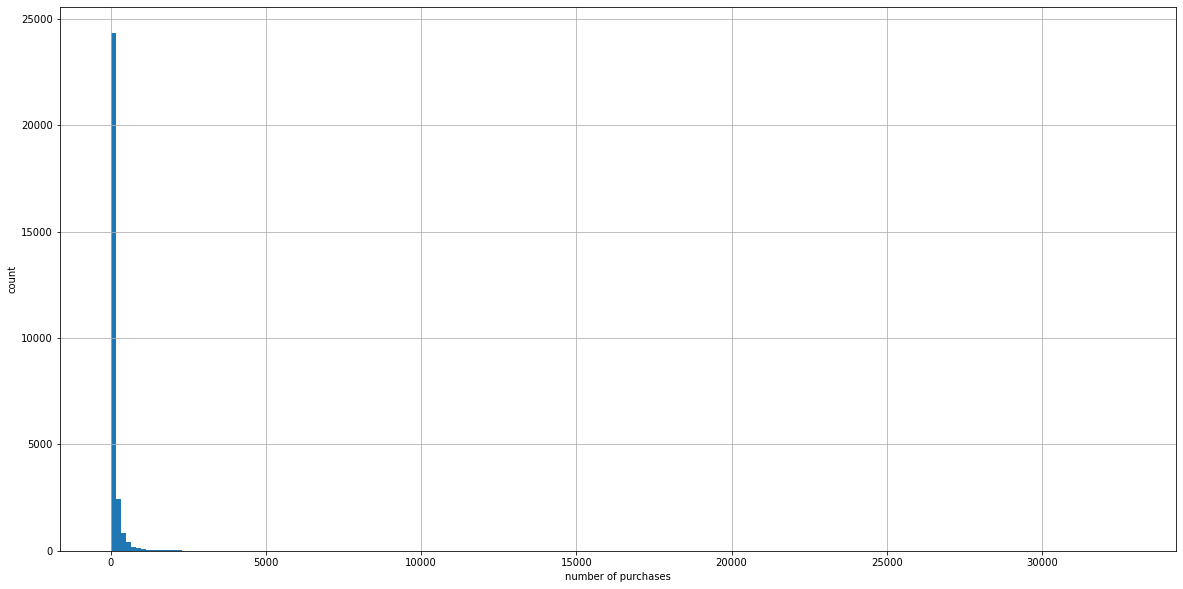

In [75]:
plt.figure(figsize=(20, 10))
product_rating['number_of_purchases'].hist(bins=200)
plt.xlabel('number of purchases')
plt.ylabel('count')

In [64]:
product_rating['number_of_purchases'].sort_values(ascending=False)

product_id
5809910    32689
5809912    12520
5900651    10208
5751383     8572
5700037     8460
           ...  
5711717        1
5800696        1
5659672        1
5882347        1
5853117        1
Name: number_of_purchases, Length: 28739, dtype: int64

In [65]:
product_rating['number_of_purchases'].describe()

count    28739.000000
mean       115.377083
std        357.282863
min          1.000000
25%         20.000000
50%         45.000000
75%        103.000000
max      32689.000000
Name: number_of_purchases, dtype: float64

#### Product id `5809910` has been purchases over 32000 times. On average, each product is purchased 357 times

In [78]:
df.query('product_id == "5809910"').head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,qty,user_purchase_score,product_purchase_score,user_view_score,user_brand_affinity
52787,2019-11-01 00:09:44 UTC,view,5809910,1602943681873052386,NaN,grattol,5.24,249305749,e707213f-7920-49e5-9386-55e3a516e069,0,0.5,0.131939,0.25,0.75
52788,2019-11-01 00:09:44 UTC,view,5809910,1602943681873052386,NaN,grattol,5.24,249305749,e707213f-7920-49e5-9386-55e3a516e069,0,0.5,0.131939,0.25,0.25
52789,2019-11-01 00:10:12 UTC,cart,5809910,1602943681873052386,NaN,grattol,5.24,249305749,e707213f-7920-49e5-9386-55e3a516e069,0,0.5,0.131939,0.25,0.75
52790,2019-11-01 00:10:12 UTC,cart,5809910,1602943681873052386,NaN,grattol,5.24,249305749,e707213f-7920-49e5-9386-55e3a516e069,0,0.5,0.131939,0.25,0.25
52791,2019-11-01 00:31:47 UTC,purchase,5809910,1602943681873052386,NaN,grattol,5.24,249305749,e707213f-7920-49e5-9386-55e3a516e069,1,0.5,0.131939,0.25,0.75


### Finding relationship between number of times a product has been purchased and it's average purchase rate

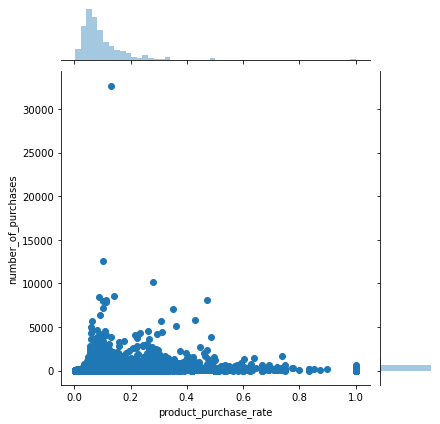

In [79]:
sns.jointplot(x='product_purchase_rate', y='number_of_purchases', data=product_rating)

#### Summary
* products which have lower purchase rate could imply varied purchase i.e user views/purchases wide array of products. 
* There is also a spike at product purchase rate at `1` implying a single item buy from site
* There isn't a strong correlationship between popularity of a product(how freqently it is bought as compared to other purchases) and the number of times it is bought overall. 


### Finding similar items by using correlation bettween product purchase rates

### Use a pivot table to create a user, product matrix where values represent the purchase rate

In [80]:
user_product_matrix = df.pivot_table(index='user_id', columns='product_id', values='user_purchase_score')

In [81]:
user_product_matrix.head()

product_id,3762,3763,3774,3776,3928,3936,3945,3959,3978,4006,...,5908238,5908239,5908240,5908242,5908297,5908793,5908811,5908820,5909070,5909232
user_id,,,,,,,,,,,,,,,,,,,,,
9794320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10280338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15781728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19762782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28048440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
product_rating.sort_values('number_of_purchases', ascending=False).head()

,product_purchase_rate,number_of_purchases
product_id,,
5809910,0.131939,32689
5809912,0.102380,12520
5900651,0.279783,10208
5751383,0.140853,8572
5700037,0.089142,8460


#### Assume user has bought product ids `5809910` and `5809912`, what would be products with similar purchase rates?

In [97]:
user_product_matrix[3762]

user_id
9794320     NaN
10280338    NaN
15781728    NaN
19762782    NaN
28048440    NaN
             ..
579906406   NaN
579916096   NaN
579924768   NaN
579925377   NaN
579944216   NaN
Name: 3762, Length: 26912, dtype: float64

In [98]:
similar_to_5809910 = user_product_matrix.corrwith(user_product_matrix[5809910])

/Users/sunshah/miniconda/envs/ecommerce/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/sunshah/miniconda/envs/ecommerce/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [104]:
similar_to_5809910.dropna().sort_values().head()

product_id
5561064   -1.0
5814041   -1.0
5839038   -1.0
5815730   -1.0
5809318   -1.0
dtype: float64